In [34]:
import numpy as np
import pockels_cal as pc
import h5py
import matplotlib.pyplot as plt

In [35]:
def printname(name): 
    print(name)

In [36]:
swept_dir = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/swept_frequency/03_03_2021_swept_pk'
comb_dir= '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/swept_frequency/03_03_2021_comb_pk'
noise_dir = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/swept_frequency/03_03_2021_noise_pk'
swept_dir1 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/swept_frequency/03_07_2021_swept_pk'
swept_dir2 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/swept_frequency/03_10_2021_swept_pk'
swept_dir3 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/results/swept_frequency_mech_test/03_10_2021_swept_pk'
swept_dat = h5py.File(swept_dir + '/data.hdf5', 'r') 
swept_dat1 = h5py.File(swept_dir1 + '/data.hdf5', 'r')
comb_dat = h5py.File(comb_dir + '/data.hdf5', 'r')
noise_dat = h5py.File(noise_dir + '/data.hdf5','r')
swept_dat2 = h5py.File(swept_dir2 + '/data.hdf5', 'r')
swept_dat3 = h5py.File(swept_dir3 + '/data.hdf5', 'r')

In [37]:
swept_dat.visit(printname)

calibrated
calibrated/HzpV
calibrated/disp_spect_norm
calibrated/disp_spect_unnorm
calibrated/hva
calibrated/hva/ch1
calibrated/hva/ch3+pomona
calibrated/olg
calibrated/phase_resp_norm
calibrated/phase_resp_unnorm
cav_length
freq
laserV2Hz
laser_freq
pomona_vdivider
raw
raw/cal
raw/cal/deg
raw/cal/gain
raw/hva
raw/hva/ch1
raw/hva/ch1/db
raw/hva/ch1/deg
raw/hva/ch3+pomona
raw/hva/ch3+pomona/db
raw/hva/ch3+pomona/deg
raw/meas_freq_resp
raw/meas_freq_resp/db
raw/meas_freq_resp/deg
raw/olg
raw/olg/db
raw/olg/deg
raw/vdirect
raw/vdirect/db
raw/vdirect/deg


In [38]:
swept_dat1.visit(printname)

calibrated
calibrated/HzpV
calibrated/disp_spect_norm
calibrated/disp_spect_unnorm
calibrated/hva
calibrated/hva/ch1
calibrated/hva/ch3+pomona
calibrated/olg
calibrated/phase_resp_norm
calibrated/phase_resp_unnorm
cav_length
freq
laserV2Hz
laser_freq
pomona_vdivider
raw
raw/cal
raw/cal/deg
raw/cal/gain
raw/hva
raw/hva/ch1
raw/hva/ch1/db
raw/hva/ch1/deg
raw/hva/ch3+pomona
raw/hva/ch3+pomona/db
raw/hva/ch3+pomona/deg
raw/meas_freq_resp
raw/meas_freq_resp/db
raw/meas_freq_resp/deg
raw/olg
raw/olg/db
raw/olg/deg
raw/vdirect
raw/vdirect/db
raw/vdirect/deg


In [39]:
comb_dat.visit(printname)

calibrated
calibrated/HzpV
calibrated/disp_spect
calibrated/hva
calibrated/hva/ch3+pomona
calibrated/olg
cav_length
freq
laserV2Hz
laser_freq
raw
raw/cal
raw/cal/deg
raw/cal/gain
raw/hva
raw/hva/ch3+pomona
raw/hva/ch3+pomona/db
raw/hva/ch3+pomona/deg
raw/olg
raw/olg/db
raw/olg/deg
raw/v_spect


In [40]:
noise_dat.visit(printname)

calibrated
calibrated/HzpV
calibrated/disp_spect
calibrated/hva
calibrated/hva/ch3+pomona
calibrated/olg
cav_length
freq
laserV2Hz
laser_freq
raw
raw/cal
raw/cal/deg
raw/cal/gain
raw/hva
raw/hva/ch3+pomona
raw/hva/ch3+pomona/db
raw/hva/ch3+pomona/deg
raw/olg
raw/olg/db
raw/olg/deg
raw/v_spect


In [41]:
model_freq = 10000
marty_estimate = 3.8e-16 #mpk/[V*m]
Efield_strength_estimate = 6350 #[V*m]

Text(0.5, 0, 'frequency [Hz]')

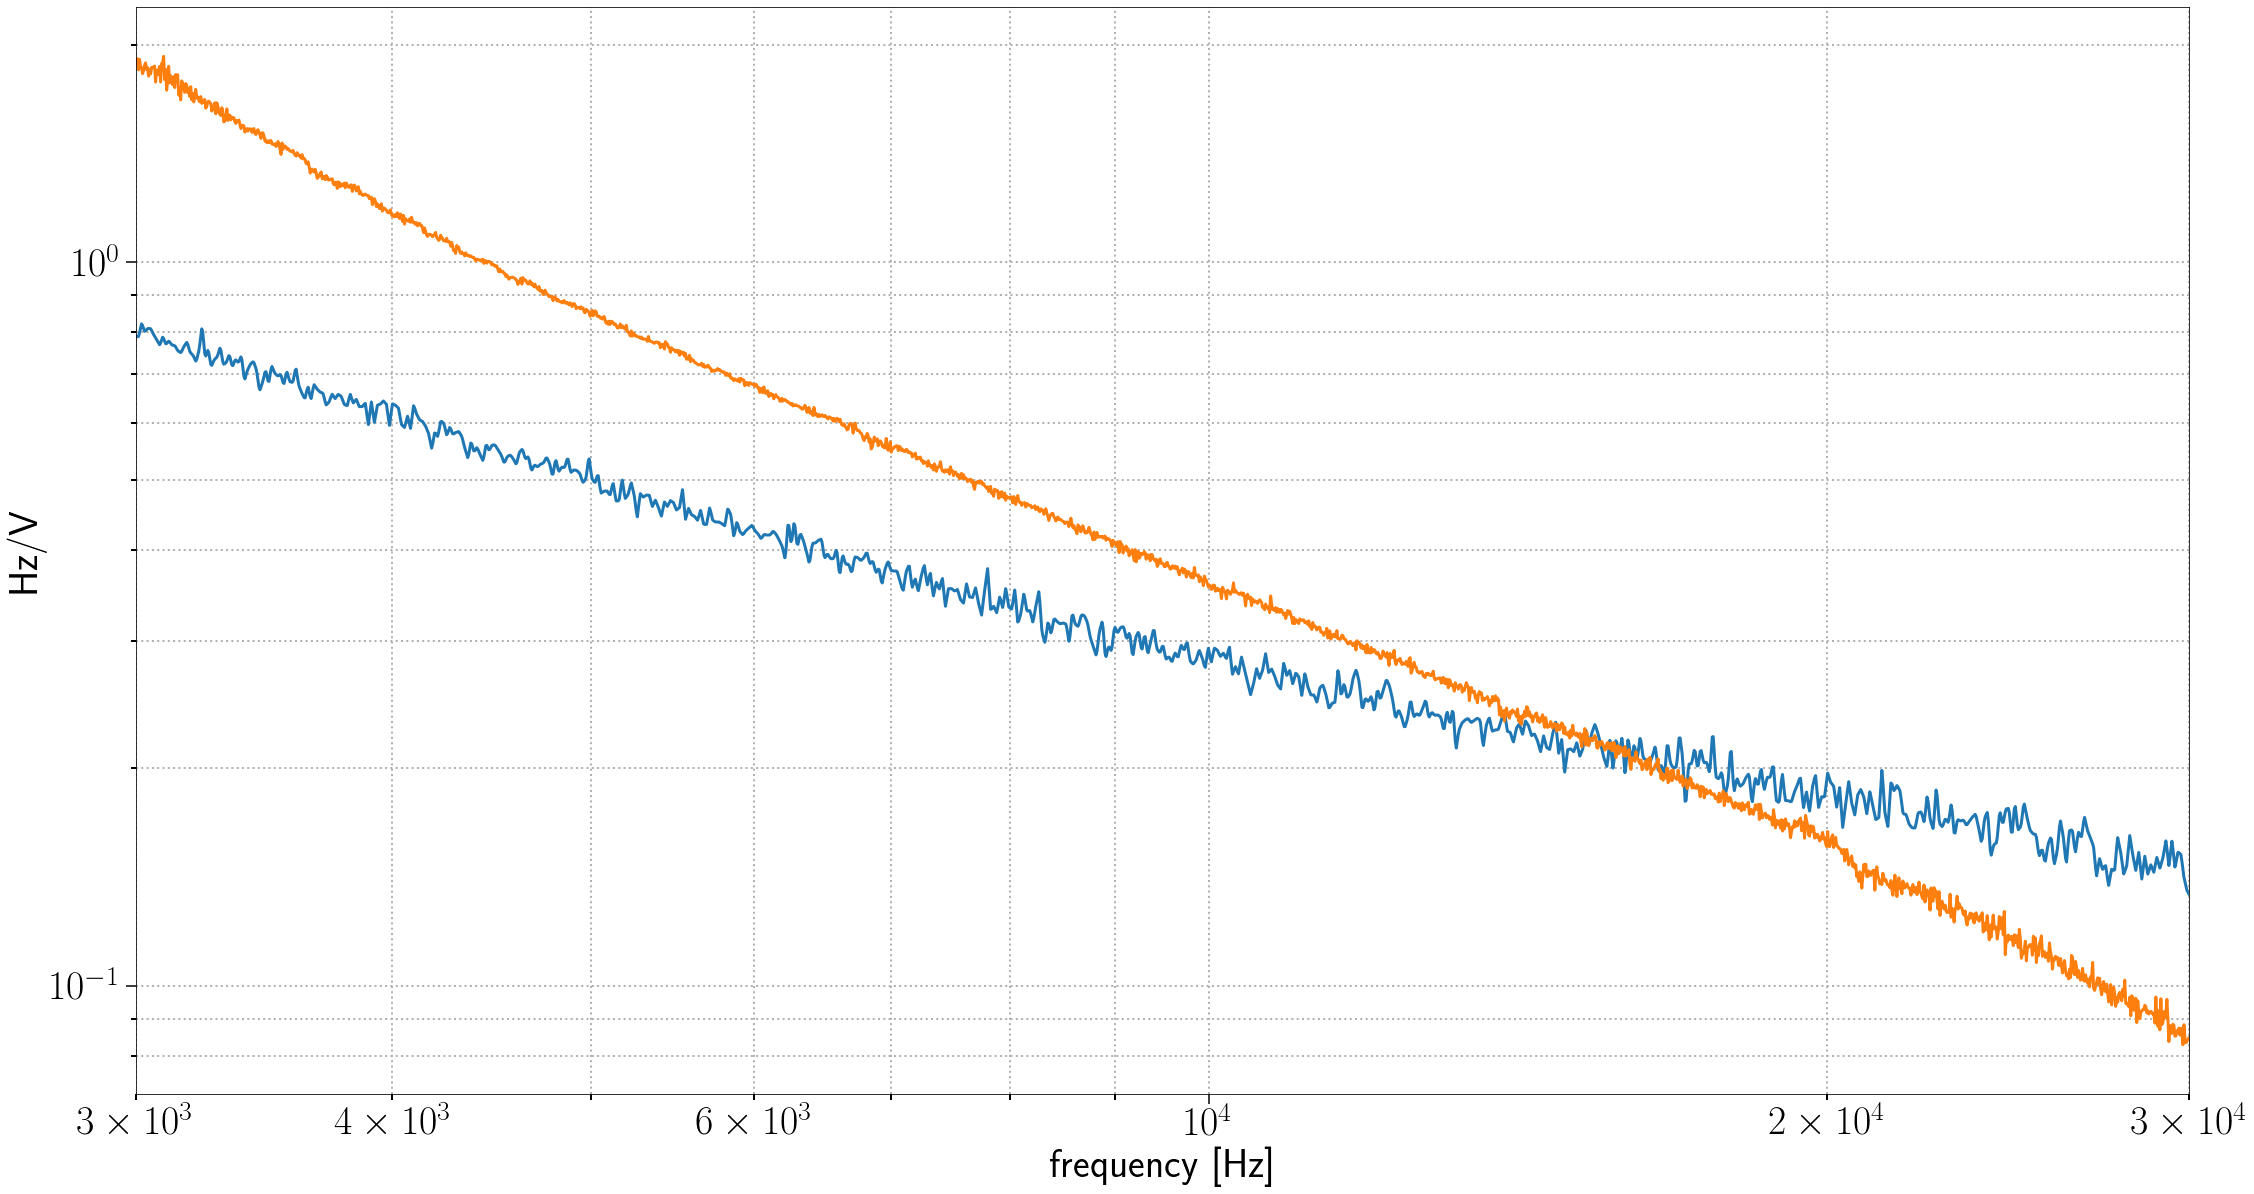

In [32]:
plt.loglog(swept_dat['freq'][:], (abs(swept_dat['calibrated/hva/ch3+pomona'][:])*swept_dat['laserV2Hz'])/(1e7))
plt.loglog(swept_dat['freq'][:],abs(swept_dat['calibrated/olg'][:]))
plt.xlim([swept_dat['freq'][0], swept_dat['freq'][-1]])
plt.ylabel('Hz/V')
plt.xlabel('frequency [Hz]')

Text(0.5, 0, 'frequency [Hz]')

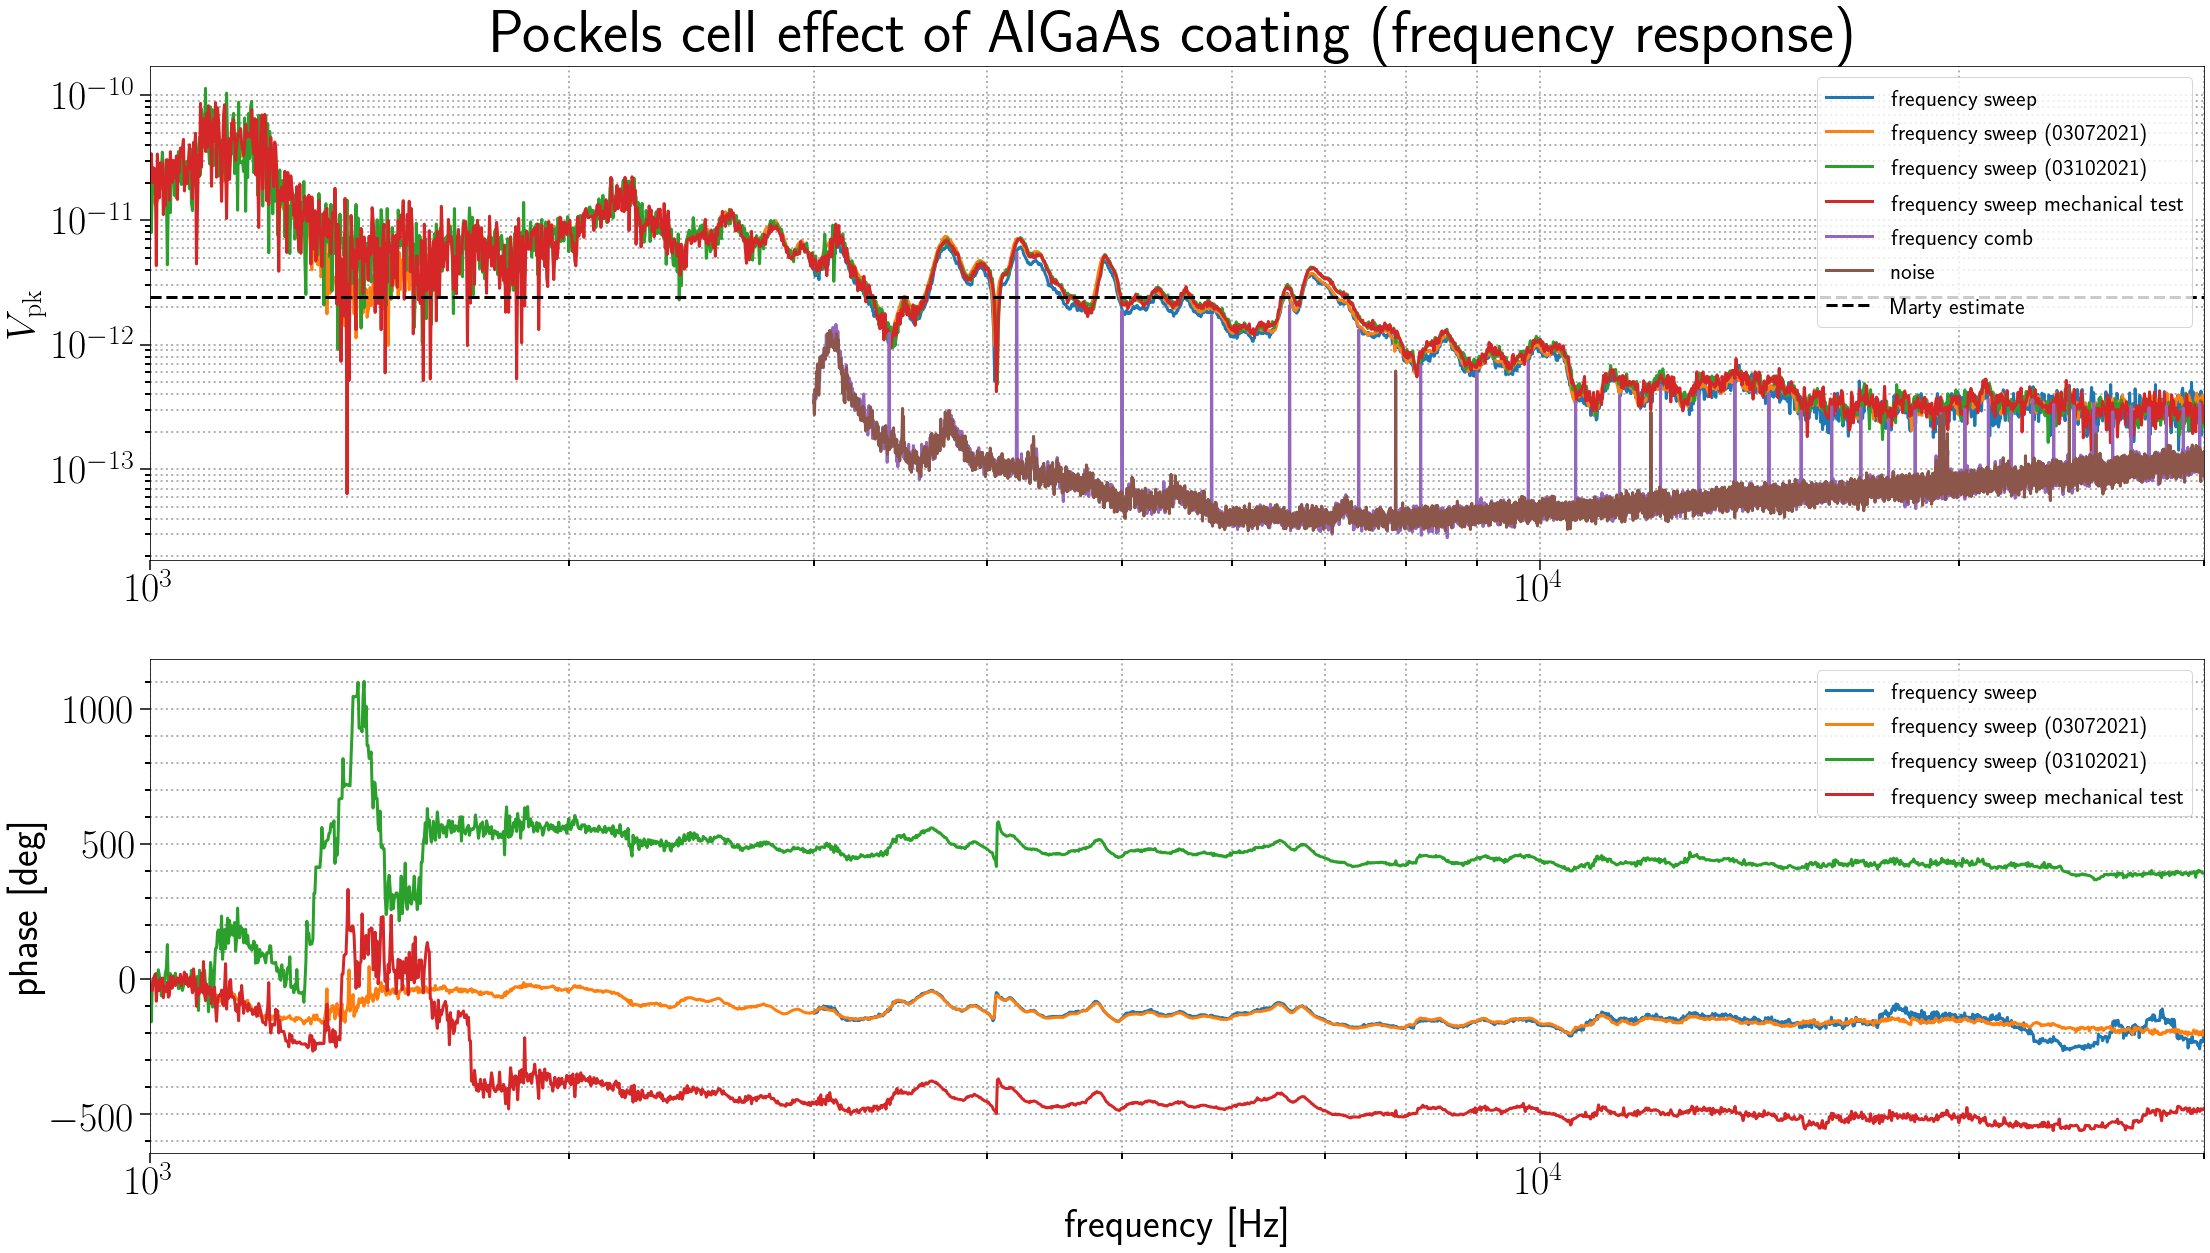

In [43]:
plt.subplot(211)
plt.loglog(swept_dat['freq'][:], swept_dat['calibrated/disp_spect_unnorm'][:],label='frequency sweep')
plt.loglog(swept_dat1['freq'][:], swept_dat1['calibrated/disp_spect_unnorm'][:],label='frequency sweep (03072021)')
plt.loglog(swept_dat2['freq'][:], swept_dat2['calibrated/disp_spect_unnorm'][:],label='frequency sweep (03102021)')
plt.loglog(swept_dat3['freq'][:], swept_dat3['calibrated/disp_spect_unnorm'][:],label='frequency sweep mechanical test')



#plt.loglog(swept_dat['freq'][:], swept_dat['calibrated/disp_spect_norm'][:]*200,label='frequency sweep normalized * 200)')
plt.loglog(comb_dat['freq'], comb_dat['calibrated/disp_spect'],label = 'frequency comb')
plt.loglog(noise_dat['freq'], noise_dat['calibrated/disp_spect'], label='noise')
plt.axhline(y=marty_estimate*Efield_strength_estimate,linestyle='--',color='k', label='Marty estimate')
plt.legend(prop={'size':23})
plt.xlim([swept_dat1['freq'][0],swept_dat['freq'][-1]])
plt.ylabel('$$V_\mathrm{pk}$$')
plt.title('Pockels cell effect of AlGaAs coating (frequency response)')
plt.subplot(212)
plt.semilogx(swept_dat['freq'], swept_dat['calibrated/phase_resp_unnorm'][:], discont=180), label='frequency sweep')
plt.semilogx(swept_dat1['freq'], np.unwrap(swept_dat1['calibrated/phase_resp_unnorm'][:], discont=180), label='frequency sweep (03072021)')
plt.semilogx(swept_dat2['freq'], np.unwrap(swept_dat2['calibrated/phase_resp_unnorm'][:], discont=180), label='frequency sweep (03102021)')
plt.semilogx(swept_dat3['freq'], np.unwrap(swept_dat3['calibrated/phase_resp_unnorm'][:], discont=180), label='frequency sweep mechanical test')#plt.semilogx(swept_dat['freq'], swept_dat['calibrated/phase_resp_unnorm'], label='frequency sweep')
plt.xlim([swept_dat1['freq'][0],swept_dat['freq'][-1]])
plt.legend(prop={'size':23})
plt.ylabel('phase [deg]')
plt.xlabel('frequency [Hz]')

In [44]:
plt.loglog(swept_dat['freq'][:], swept_dat['raw/v_spectra'][:],label='frequency sweep')

KeyError: "Unable to open object (object 'v_spectra' doesn't exist)"

## Voltage directly sent to electrodes

Text(0.5, 0, 'frequency [Hz]')

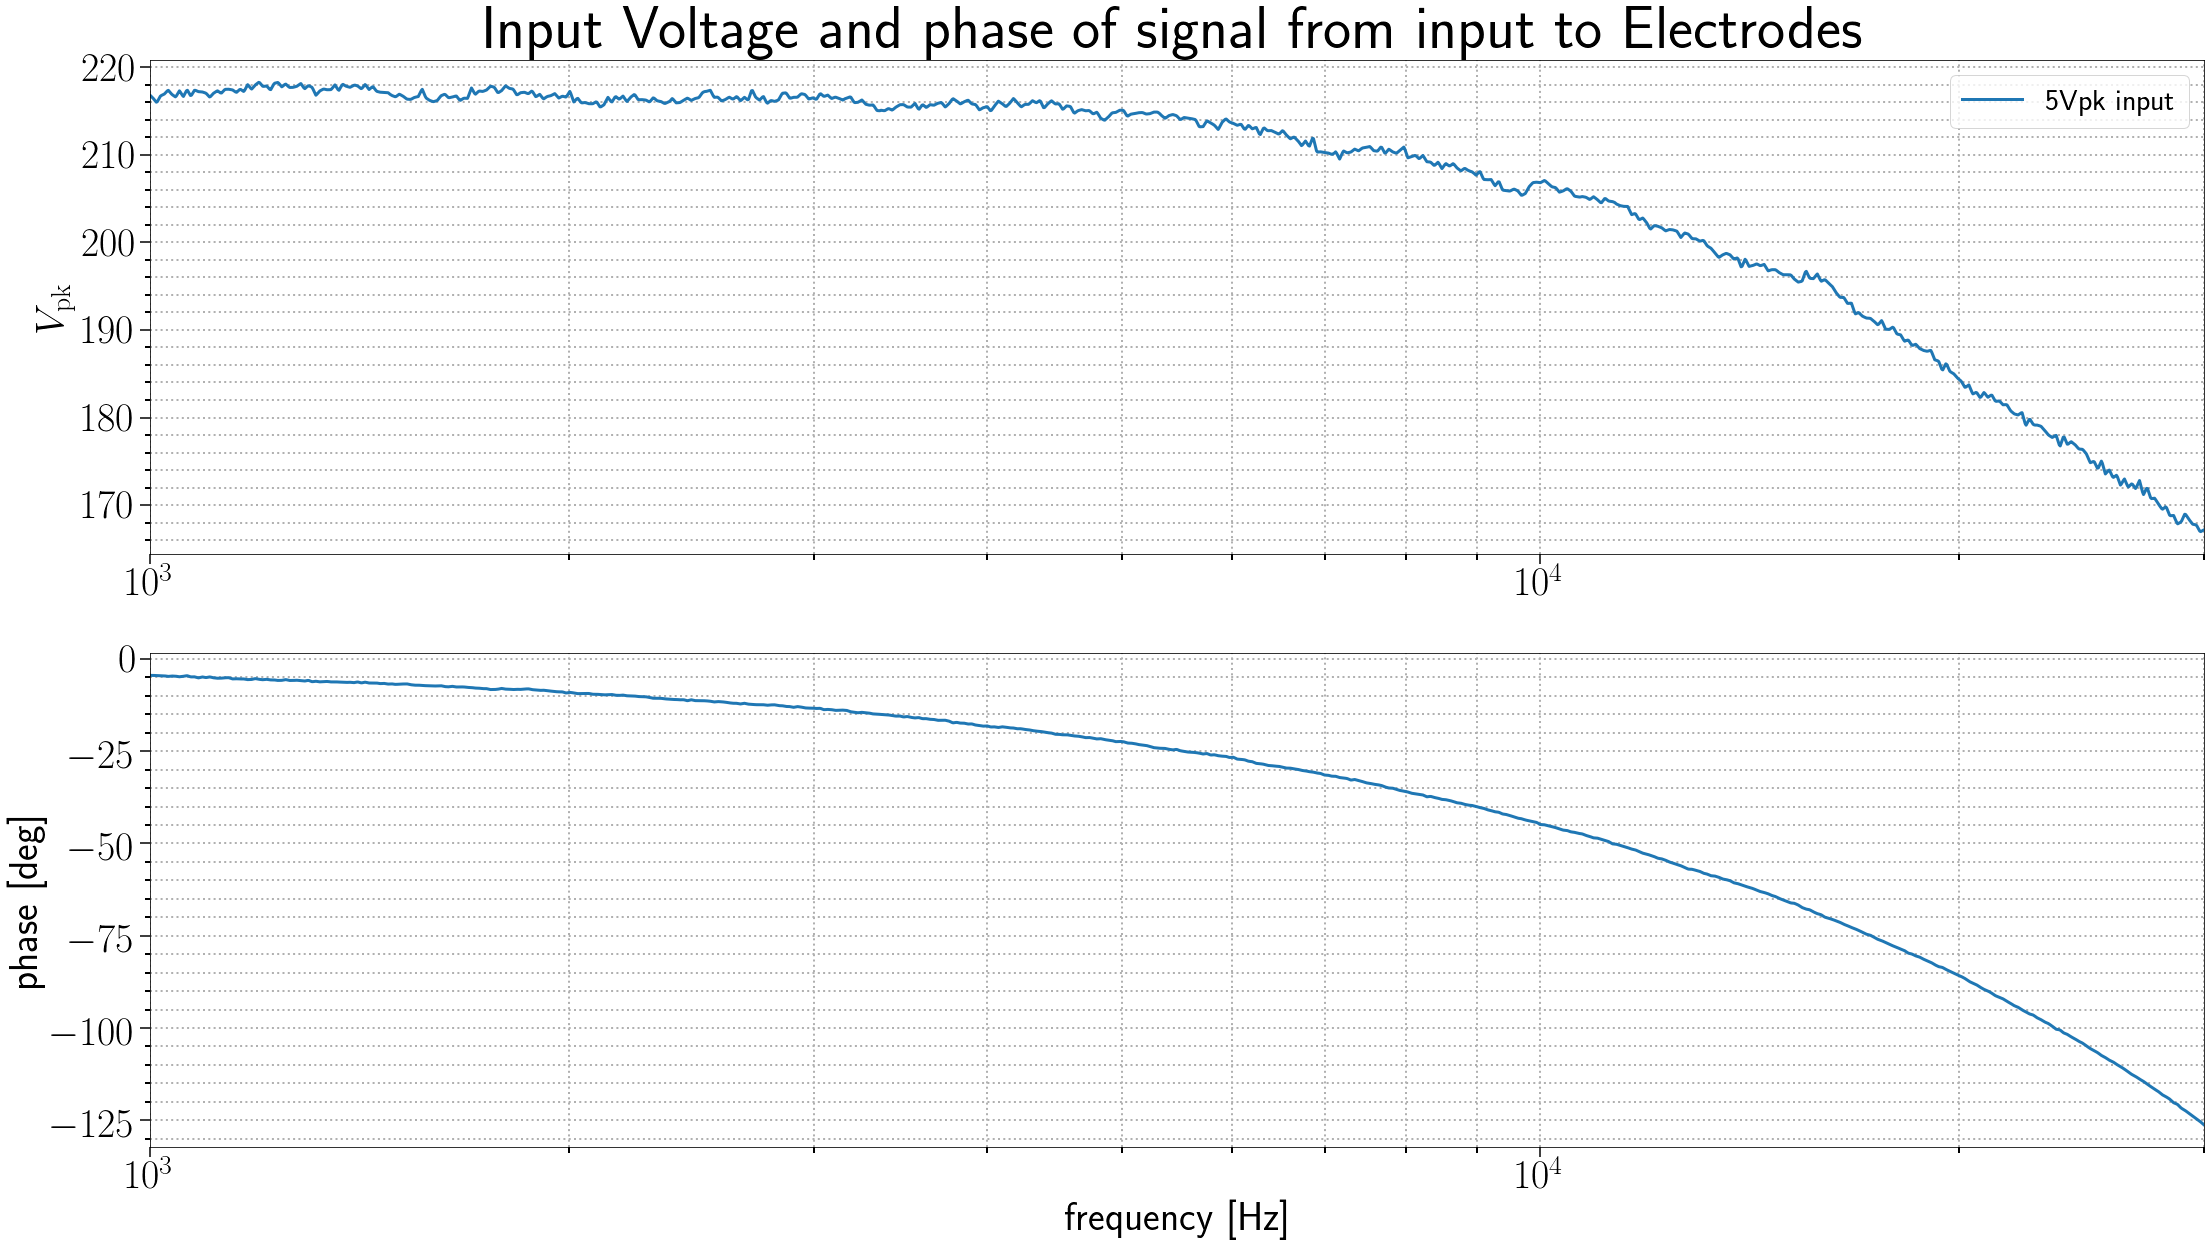

In [8]:
plt.subplot(211)
plt.semilogx(swept_dat1['freq'],swept_dat1['raw/vdirect/db'],label='5Vpk input')
plt.legend(prop={'size':30})
plt.xlim([swept_dat1['freq'][0],swept_dat1['freq'][-1]])
plt.ylabel('$$V_\mathrm{pk}$$')
plt.title('Input Voltage and phase of signal from input to Electrodes')
plt.subplot(212)
#plt.semilogx(swept_dat['freq'], np.unwrap(swept_dat['calibrated/phase_resp_unnorm'][:], discont=180), label='frequency sweep')
plt.semilogx(swept_dat1['freq'], swept_dat1['raw/vdirect/deg'])
plt.xlim([swept_dat1['freq'][0],swept_dat1['freq'][-1]])
#plt.legend(prop={'size':30})
plt.ylabel('phase [deg]')
plt.xlabel('frequency [Hz]')